<a id='home'></a>

# Machine Learning Engineer Nanodegree
## Capstone Project


* [Definition](#step1) : Problem Definition Section
* [Analysis](#step2) : Analysis Conducted
* [Methodology](#step3) : Methodology Adopted
* [Results](#step4) : Results of Analysis
* [Conclusion](#step5) : Inferences Drawn
* [Reference](#step6) : References Used


<a id='step1'></a>
## Definition

* [Project Overview](#stepa): Overview
* [Problem Statement](#stepa) : Detailed statement
* [Metrics](#stepc) : Evaluation Parameter

#### [Home](#home) : Back to Top


<a id='stepa'></a>

### Project Overview: Creating Customer Segments from NYC School Data
In this project, we are conidering data from Kaggle courtesy PASSNYC, a not-for-profit organization that facilitates a collective impact that is dedicated to broadening educational opportunities for New York City's talented and underserved students.  PASSNYC uses public data to identify students within New York City’s under-performing school districts and, through consulting and collaboration with partners, aims to increase the diversity of students taking the Specialized High School Admissions Test (SHSAT). 

The objective is to assess the needs of students by using this data to quantify the challenges students face in taking the SHSAT. By segmenting and clustering, we can identify the schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents.

My personal motivation in selecting this domain is two-fold. I work for a company matching high school athletes to sports programs, so I wish to understand clustering better as applicable to school programs.  Also, as an online student and micro-volunteer with school programs, it is of personal interest too.

<a id='stepb'></a>

### Problem Statement:
In this project, the objective is to describe the variation in the different types of schools present in NYC. Based on demographic diversity or lack thereof other features of the school, the idea is to create categories of that represent subsets that together represent all the schools. The intent is that by segmenting and clustering, we gain an improved understanding of the segments/schools where minority and underserved students stand to gain the most from services like after school programs, test preparation, mentoring, or resources for parents. Thus, the clustering can be used to better equip these programs and how best to serve the schools. 

To perform clustering on the data, we shall be using two techniques :Gaussian Mixture model and K-means clustering to create the clusters and decide on the optimal number of clusters. 

<a id='stepc'></a>

### Metrics:
Here, our solution is to determine the different segments present in the dataset. We will quantify the "goodness" of the clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient will provide for a simple scoring method for our clustering and we shall take the best silhouette score of the different algorithms used.
Silhouette score can be computed using sklearn library.
Additionally, we will also verify the optimal number of clusters using the Elbow curve method.

<a id='step2'></a>


## Analysis

* [Data Exploration](#stepx): Exploratory Analysis
* [Exploratory Visualization](#stepy) :Vizzes and Exploration
* [Algorithms and Techniques](#stepz) : Methods adopted
* [Benchmark](#stepq) : Reference Model

#### [Home](#home): Back to Top

<a id='stepx'></a>

### Data Exploration
The dataset are taken from Kaggle at:
https://www.kaggle.com/laiyipeng/target-schools-action-recommended-for-passnyc/data

This is a dataset hosted by the City of New York and has demographic statistics broken down by school districts. It contains data about the percentage of students who belong to various races like White, Latino/Hispanic, African American, Pacific Islander or Alaskan, multi racial, economically disdvantaged. Their ELA and Math test scores are also provided, both averages as well as for each grade 3-8. We also have attributes such as Economic Need Index, Student Attendance Rate, Ratings on parameters such as Rigorous Instruction, Effective School Leadership, Trust, etc. 
By joining on the SHSAT dataset, we also get the corresponding values of how many students registered and then attempted the test, as well as how many were finally amde an offer. 
Please find below the detailed exploration of the datasets.

In [1]:
#Read and explore the datasets.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import csv


# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

df = pd.read_csv('2016 School Explorer.csv')
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [3]:
df.shape

(1272, 161)

In [4]:
df.head(3)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0


In [5]:
df1 = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
df1.info()
df1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
DBN                                                140 non-null object
School name                                        140 non-null object
Year of SHST                                       140 non-null int64
Grade level                                        140 non-null int64
Enrollment on 10/31                                140 non-null int64
Number of students who registered for the SHSAT    140 non-null int64
Number of students who took the SHSAT              140 non-null int64
dtypes: int64(5), object(2)
memory usage: 7.7+ KB


,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10


In [6]:
#2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv
df3 = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv')
df3.info()
df3.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 5 columns):
Feeder School DBN                     594 non-null object
Feeder School Name                    594 non-null object
Count of Students in HS Admissions    594 non-null int64
Count of Testers                      594 non-null int64
Count of Offers                       594 non-null int64
dtypes: int64(3), object(2)
memory usage: 23.3+ KB


,Feeder School DBN,Feeder School Name,Count of Students in HS Admissions,Count of Testers,Count of Offers
0,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,58,6,5
1,01M140,P.S. 140 NATHAN STRAUS,67,6,5
2,01M184,P.S. 184M SHUANG WEN,88,67,23


In [7]:
dfx= df.merge(df1, how='left', right_on='DBN' , left_on='Location Code')
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Columns: 168 entries, Adjusted Grade to Number of students who took the SHSAT
dtypes: float64(10), int64(123), object(35)
memory usage: 1.8+ MB


In [8]:
dfx.shape

(1364, 168)

In [9]:
dfy = df.merge(df1, how='left', right_on='DBN' , left_on='Location Code')
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Columns: 168 entries, Adjusted Grade to Number of students who took the SHSAT
dtypes: float64(10), int64(123), object(35)
memory usage: 1.8+ MB


In [10]:
dfy.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display a description of the dataset
display(dfy.describe())

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,...,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
count,1.364000e+03,1364.000000,1364.000000,1364.000000,1364.000000,1339.000000,1309.000000,1309.000000,1364.000000,1364.000000,...,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,3.274443e+11,15.384164,40.739964,-73.920300,10762.730938,0.677808,2.530527,2.667540,58.475806,4.734604,...,1.850440,0.905425,0.002199,0.148827,3.000000,2014.601770,8.309735,93.486726,22.716814,11.442478
std,1.265045e+10,9.354700,0.086044,0.078165,548.074632,0.205944,0.361546,0.473053,57.315286,8.084927,...,12.410368,6.648429,0.081230,1.276455,12.312154,1.122337,0.464444,48.200310,24.419865,10.398264
min,3.075000e+11,1.000000,40.507803,-74.244025,10001.000000,0.049000,1.810000,1.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,8.000000,35.000000,0.000000,0.000000
25%,3.207000e+11,7.000000,40.672706,-73.955847,10304.000000,0.559500,2.260000,2.290000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,8.000000,66.000000,4.000000,3.000000
50%,3.314000e+11,14.000000,40.736511,-73.925881,10738.000000,0.737000,2.450000,2.580000,52.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,8.000000,86.000000,17.000000,10.000000
75%,3.332000e+11,24.000000,40.816396,-73.884761,11228.000000,0.839000,2.740000,2.990000,93.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,9.000000,110.000000,30.000000,17.000000
max,3.531009e+11,32.000000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.200000,356.000000,55.000000,...,246.000000,126.000000,3.000000,33.000000,196.000000,2016.000000,9.000000,344.000000,118.000000,45.000000


In [12]:
# Display a description of the dataset
display(dfx.describe())

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,...,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
count,1.364000e+03,1364.000000,1364.000000,1364.000000,1364.000000,1339.000000,1309.000000,1309.000000,1364.000000,1364.000000,...,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,3.274443e+11,15.384164,40.739964,-73.920300,10762.730938,0.677808,2.530527,2.667540,58.475806,4.734604,...,1.850440,0.905425,0.002199,0.148827,3.000000,2014.601770,8.309735,93.486726,22.716814,11.442478
std,1.265045e+10,9.354700,0.086044,0.078165,548.074632,0.205944,0.361546,0.473053,57.315286,8.084927,...,12.410368,6.648429,0.081230,1.276455,12.312154,1.122337,0.464444,48.200310,24.419865,10.398264
min,3.075000e+11,1.000000,40.507803,-74.244025,10001.000000,0.049000,1.810000,1.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,8.000000,35.000000,0.000000,0.000000
25%,3.207000e+11,7.000000,40.672706,-73.955847,10304.000000,0.559500,2.260000,2.290000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,8.000000,66.000000,4.000000,3.000000
50%,3.314000e+11,14.000000,40.736511,-73.925881,10738.000000,0.737000,2.450000,2.580000,52.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,8.000000,86.000000,17.000000,10.000000
75%,3.332000e+11,24.000000,40.816396,-73.884761,11228.000000,0.839000,2.740000,2.990000,93.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,9.000000,110.000000,30.000000,17.000000
max,3.531009e+11,32.000000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.200000,356.000000,55.000000,...,246.000000,126.000000,3.000000,33.000000,196.000000,2016.000000,9.000000,344.000000,118.000000,45.000000


In [13]:
dfy['AllTested'] =  dfy[['Grade 3 ELA - All Students Tested', 
                         'Grade 4 ELA - All Students Tested',
                         'Grade 5 ELA - All Students Tested',
                        'Grade 6 ELA - All Students Tested',
                        'Grade 7 ELA - All Students Tested',
                        'Grade 8 ELA - All Students Tested']].mean(axis=1)

dfy['All4'] =  dfy[['Grade 3 ELA 4s - All Students', 
                    'Grade 4 ELA 4s - All Students',
                   'Grade 5 ELA 4s - All Students',
                   'Grade 6 ELA 4s - All Students',
                   'Grade 7 ELA 4s - All Students',
                   'Grade 8 ELA 4s - All Students']].mean(axis=1)

dfy['Native4'] =  dfy[['Grade 3 ELA 4s - American Indian or Alaska Native', 
                       'Grade 4 ELA 4s - American Indian or Alaska Native',
                      'Grade 5 ELA 4s - American Indian or Alaska Native',
                      'Grade 6 ELA 4s - American Indian or Alaska Native',
                      'Grade 7 ELA 4s - American Indian or Alaska Native',
                      'Grade 8 ELA 4s - American Indian or Alaska Native']].mean(axis=1)

dfy['AfricanAmerican4'] =  dfy[['Grade 3 ELA 4s - Black or African American', 
                                'Grade 4 ELA 4s - Black or African American',
                               'Grade 5 ELA 4s - Black or African American',
                               'Grade 6 ELA 4s - Black or African American',
                               'Grade 7 ELA 4s - Black or African American',
                               'Grade 8 ELA 4s - Black or African American']].mean(axis=1)

dfy['Latino4'] =  dfy[['Grade 3 ELA 4s - Hispanic or Latino', 
                       'Grade 4 ELA 4s - Hispanic or Latino',
                      'Grade 5 ELA 4s - Hispanic or Latino',
                      'Grade 6 ELA 4s - Hispanic or Latino',
                      'Grade 7 ELA 4s - Hispanic or Latino',
                      'Grade 8 ELA 4s - Hispanic or Latino']].mean(axis=1)

dfy['Islander4'] =  dfy[['Grade 3 ELA 4s - Asian or Pacific Islander', 
                         'Grade 4 ELA 4s - Asian or Pacific Islander',
                        'Grade 5 ELA 4s - Asian or Pacific Islander',
                        'Grade 6 ELA 4s - Asian or Pacific Islander',
                        'Grade 7 ELA 4s - Asian or Pacific Islander',
                        'Grade 8 ELA 4s - Asian or Pacific Islander']].mean(axis=1)

dfy['White4'] = dfy[['Grade 3 ELA 4s - White',
                     'Grade 4 ELA 4s - White',
                    'Grade 5 ELA 4s - White',
                    'Grade 6 ELA 4s - White',
                    'Grade 7 ELA 4s - White',
                    'Grade 8 ELA 4s - White']].mean(axis=1)

dfy['Multiracial4'] = dfy[['Grade 3 ELA 4s - Multiracial',
                           'Grade 4 ELA 4s - Multiracial',
                          'Grade 5 ELA 4s - Multiracial',
                          'Grade 6 ELA 4s - Multiracial',
                          'Grade 7 ELA 4s - Multiracial',
                          'Grade 8 ELA 4s - Multiracial']].mean(axis=1)

dfy['LimitedEnglish4'] = dfy[['Grade 3 ELA 4s - Limited English Proficient',
                              'Grade 4 ELA 4s - Limited English Proficient',
                             'Grade 5 ELA 4s - Limited English Proficient',
                             'Grade 6 ELA 4s - Limited English Proficient',
                             'Grade 7 ELA 4s - Limited English Proficient',
                             'Grade 8 ELA 4s - Limited English Proficient']].mean(axis=1)

dfy['Disadv4'] = dfy[['Grade 3 ELA 4s - Economically Disadvantaged',
                      'Grade 4 ELA 4s - Economically Disadvantaged',
                     'Grade 5 ELA 4s - Economically Disadvantaged',
                     'Grade 6 ELA 4s - Economically Disadvantaged',
                      'Grade 7 ELA 4s - Economically Disadvantaged',
                     'Grade 8 ELA 4s - Economically Disadvantaged']].mean(axis=1)

dfy['AllMath4Tested'] =  dfy[['Grade 3 Math - All Students tested', 
                              'Grade 4 Math - All Students Tested',
                             'Grade 5 Math - All Students Tested',
                             'Grade 6 Math - All Students Tested',
                             'Grade 7 Math - All Students Tested',
                             'Grade 8 Math - All Students Tested']].mean(axis=1)

dfy['AllMath4'] =  dfy[['Grade 3 Math 4s - All Students', 
                        'Grade 4 Math 4s - All Students',
                       'Grade 5 Math 4s - All Students',
                       'Grade 6 Math 4s - All Students',
                       'Grade 7 Math 4s - All Students',
                       'Grade 8 Math 4s - All Students']].mean(axis=1)

dfy['NativeMath4'] =  dfy[['Grade 3 Math 4s - American Indian or Alaska Native', 
                           'Grade 4 Math 4s - American Indian or Alaska Native',
                        'Grade 5 Math 4s - American Indian or Alaska Native',
                          'Grade 6 Math 4s - American Indian or Alaska Native',
                          'Grade 7 Math 4s - American Indian or Alaska Native',
                          'Grade 8 Math 4s - American Indian or Alaska Native']].mean(axis=1)

dfy['AfricanAmericanMath4'] =  dfy[['Grade 3 Math 4s - Black or African American', 
                                    'Grade 4 Math 4s - Black or African American',
                                   'Grade 5 Math 4s - Black or African American',
                                   'Grade 6 Math 4s - Black or African American',
                                   'Grade 7 Math 4s - Black or African American',
                                   'Grade 8 Math 4s - Black or African American']].mean(axis=1)

dfy['LatinoMath4'] =  dfy[['Grade 3 Math 4s - Hispanic or Latino', 
                           'Grade 4 Math 4s - Hispanic or Latino',
                          'Grade 5 Math 4s - Hispanic or Latino',
                          'Grade 6 Math 4s - Hispanic or Latino',
                          'Grade 7 Math 4s - Hispanic or Latino',
                          'Grade 8 Math 4s - Hispanic or Latino']].mean(axis=1)

dfy['IslanderMath4'] =  dfy[['Grade 3 Math 4s - Asian or Pacific Islander', 
                             'Grade 4 Math 4s - Asian or Pacific Islander',
                            'Grade 5 Math 4s - Asian or Pacific Islander',
                            'Grade 6 Math 4s - Asian or Pacific Islander',
                            'Grade 7 Math 4s - Asian or Pacific Islander',
                            'Grade 8 Math 4s - Asian or Pacific Islander']].mean(axis=1)

dfy['WhiteMath4'] = dfy[['Grade 3 Math 4s - White',
                         'Grade 4 Math 4s - White',
                        'Grade 5 Math 4s - White',
                        'Grade 6 Math 4s - White',
                        'Grade 7 Math 4s - White',
                        'Grade 8 Math 4s - White']].mean(axis=1)

dfy['MultiracialMath4'] = dfy[['Grade 3 ELA 4s - Multiracial',
                               'Grade 4 Math 4s - Multiracial',
                              'Grade 5 Math 4s - Multiracial',
                              'Grade 6 Math 4s - Multiracial',
                              'Grade 7 Math 4s - Multiracial',
                              'Grade 8 Math 4s - Multiracial']].mean(axis=1)

dfy['LimitedEnglishMath4'] = dfy[['Grade 3 Math 4s - Limited English Proficient',
                                  'Grade 4 Math 4s - Limited English Proficient',
                                 'Grade 5 Math 4s - Limited English Proficient',
                                 'Grade 6 Math 4s - Limited English Proficient',
                                 'Grade 7 Math 4s - Limited English Proficient',
                                 'Grade 8 Math 4s - Limited English Proficient']].mean(axis=1)

dfy['DisadvMath4'] = dfy[['Grade 3 Math 4s - Economically Disadvantaged',
                          'Grade 4 Math 4s - Economically Disadvantaged',
                         'Grade 5 Math 4s - Economically Disadvantaged',
                         'Grade 6 Math 4s - Economically Disadvantaged',
                         'Grade 7 Math 4s - Economically Disadvantaged',
                         'Grade 8 Math 4s - Economically Disadvantaged']].mean(axis=1)



In [14]:
# drop columns
dfy= dfy.drop(['Grade 3 ELA - All Students Tested', 
         'Grade 4 ELA - All Students Tested',
         'Grade 5 ELA - All Students Tested',
        'Grade 6 ELA - All Students Tested',
        'Grade 7 ELA - All Students Tested',
        'Grade 8 ELA - All Students Tested', 
        'Grade 3 ELA 4s - All Students', 
        'Grade 4 ELA 4s - All Students',
       'Grade 5 ELA 4s - All Students',
       'Grade 6 ELA 4s - All Students',
       'Grade 7 ELA 4s - All Students',
       'Grade 8 ELA 4s - All Students',
      'Grade 3 ELA 4s - American Indian or Alaska Native', 
       'Grade 4 ELA 4s - American Indian or Alaska Native',
      'Grade 5 ELA 4s - American Indian or Alaska Native',
      'Grade 6 ELA 4s - American Indian or Alaska Native',
      'Grade 7 ELA 4s - American Indian or Alaska Native',
      'Grade 8 ELA 4s - American Indian or Alaska Native',
              'Grade 3 ELA 4s - Black or African American', 
                                'Grade 4 ELA 4s - Black or African American',
                               'Grade 5 ELA 4s - Black or African American',
                               'Grade 6 ELA 4s - Black or African American',
                               'Grade 7 ELA 4s - Black or African American',
                               'Grade 8 ELA 4s - Black or African American',
'Grade 3 ELA 4s - Hispanic or Latino', 
                       'Grade 4 ELA 4s - Hispanic or Latino',
                      'Grade 5 ELA 4s - Hispanic or Latino',
                      'Grade 6 ELA 4s - Hispanic or Latino',
'Grade 7 ELA 4s - Hispanic or Latino',
                      'Grade 8 ELA 4s - Hispanic or Latino',
'Grade 3 ELA 4s - Asian or Pacific Islander', 
                         'Grade 4 ELA 4s - Asian or Pacific Islander',
                        'Grade 5 ELA 4s - Asian or Pacific Islander',
                        'Grade 6 ELA 4s - Asian or Pacific Islander',
                        'Grade 7 ELA 4s - Asian or Pacific Islander',
                        'Grade 8 ELA 4s - Asian or Pacific Islander',
'Grade 3 ELA 4s - White',
                     'Grade 4 ELA 4s - White',
                    'Grade 5 ELA 4s - White',
                    'Grade 6 ELA 4s - White',
                    'Grade 7 ELA 4s - White',
                    'Grade 8 ELA 4s - White',
'Grade 3 ELA 4s - Multiracial',
                           'Grade 4 ELA 4s - Multiracial',
                          'Grade 5 ELA 4s - Multiracial',
                          'Grade 6 ELA 4s - Multiracial',
                          'Grade 7 ELA 4s - Multiracial',
                          'Grade 8 ELA 4s - Multiracial',
'Grade 3 ELA 4s - Limited English Proficient',
                              'Grade 4 ELA 4s - Limited English Proficient',
                             'Grade 5 ELA 4s - Limited English Proficient',
                             'Grade 6 ELA 4s - Limited English Proficient',
                             'Grade 7 ELA 4s - Limited English Proficient',
                             'Grade 8 ELA 4s - Limited English Proficient',
'Grade 3 ELA 4s - Economically Disadvantaged',
                      'Grade 4 ELA 4s - Economically Disadvantaged',
                     'Grade 5 ELA 4s - Economically Disadvantaged',
                     'Grade 6 ELA 4s - Economically Disadvantaged',
                      'Grade 7 ELA 4s - Economically Disadvantaged',
                     'Grade 8 ELA 4s - Economically Disadvantaged',
'Grade 3 Math - All Students tested', 
                              'Grade 4 Math - All Students Tested',
                             'Grade 5 Math - All Students Tested',
                             'Grade 6 Math - All Students Tested',
                             'Grade 7 Math - All Students Tested',
                             'Grade 8 Math - All Students Tested',
'Grade 3 Math 4s - All Students', 
                        'Grade 4 Math 4s - All Students',
                       'Grade 5 Math 4s - All Students',
                       'Grade 6 Math 4s - All Students',
                       'Grade 7 Math 4s - All Students',
                       'Grade 8 Math 4s - All Students',
'Grade 3 Math 4s - American Indian or Alaska Native', 
                           'Grade 4 Math 4s - American Indian or Alaska Native',
                        'Grade 5 Math 4s - American Indian or Alaska Native',
                          'Grade 6 Math 4s - American Indian or Alaska Native',
                          'Grade 7 Math 4s - American Indian or Alaska Native',
                          'Grade 8 Math 4s - American Indian or Alaska Native',
'Grade 3 Math 4s - Black or African American', 
                                    'Grade 4 Math 4s - Black or African American',
                                   'Grade 5 Math 4s - Black or African American',
                                   'Grade 6 Math 4s - Black or African American',
                                   'Grade 7 Math 4s - Black or African American',
                                   'Grade 8 Math 4s - Black or African American',
'Grade 3 Math 4s - Hispanic or Latino', 
                           'Grade 4 Math 4s - Hispanic or Latino',
                          'Grade 5 Math 4s - Hispanic or Latino',
                          'Grade 6 Math 4s - Hispanic or Latino',
                          'Grade 7 Math 4s - Hispanic or Latino',
                          'Grade 8 Math 4s - Hispanic or Latino',
'Grade 3 Math 4s - Asian or Pacific Islander', 
                             'Grade 4 Math 4s - Asian or Pacific Islander',
                            'Grade 5 Math 4s - Asian or Pacific Islander',
                            'Grade 6 Math 4s - Asian or Pacific Islander',
                            'Grade 7 Math 4s - Asian or Pacific Islander',
                            'Grade 8 Math 4s - Asian or Pacific Islander',
'Grade 3 Math 4s - White',
                         'Grade 4 Math 4s - White',
                        'Grade 5 Math 4s - White',
                        'Grade 6 Math 4s - White',
                        'Grade 7 Math 4s - White',
                        'Grade 8 Math 4s - White',
'Grade 3 ELA 4s - Multiracial',
                               'Grade 4 Math 4s - Multiracial',
                              'Grade 5 Math 4s - Multiracial',
                              'Grade 6 Math 4s - Multiracial',
                              'Grade 7 Math 4s - Multiracial',
                              'Grade 8 Math 4s - Multiracial',
'Grade 3 Math 4s - Limited English Proficient',
                                  'Grade 4 Math 4s - Limited English Proficient',
                                 'Grade 5 Math 4s - Limited English Proficient',
                                 'Grade 6 Math 4s - Limited English Proficient',
                                 'Grade 7 Math 4s - Limited English Proficient',
                                 'Grade 8 Math 4s - Limited English Proficient',
'Grade 3 Math 4s - Economically Disadvantaged',
                          'Grade 4 Math 4s - Economically Disadvantaged',
                         'Grade 5 Math 4s - Economically Disadvantaged',
                         'Grade 6 Math 4s - Economically Disadvantaged',
                         'Grade 7 Math 4s - Economically Disadvantaged',
                         'Grade 8 Math 4s - Economically Disadvantaged',
              'Adjusted Grade',
              'New?','Other Location Code in LCGMS'], axis=1)

In [15]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 66 columns):
School Name                                        1364 non-null object
SED Code                                           1364 non-null int64
Location Code                                      1364 non-null object
District                                           1364 non-null int64
Latitude                                           1364 non-null float64
Longitude                                          1364 non-null float64
Address (Full)                                     1364 non-null object
City                                               1364 non-null object
Zip                                                1364 non-null int64
Grades                                             1364 non-null object
Grade Low                                          1364 non-null object
Grade High                                         1364 non-null object
Community School?             

In [16]:
dfy.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 Math 4s - Multiracial,Year of SHST,...,AllMath4Tested,AllMath4,NativeMath4,AfricanAmericanMath4,LatinoMath4,IslanderMath4,WhiteMath4,MultiracialMath4,LimitedEnglishMath4,DisadvMath4
count,1.364000e+03,1364.000000,1364.000000,1364.000000,1364.000000,1339.000000,1309.000000,1309.000000,1364.000000,113.000000,...,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,3.274443e+11,15.384164,40.739964,-73.920300,10762.730938,0.677808,2.530527,2.667540,0.061584,2014.601770,...,55.016984,10.307674,0.021505,1.526393,2.028715,3.249756,2.288368,0.046676,0.262830,5.353372
std,1.265045e+10,9.354700,0.086044,0.078165,548.074632,0.205944,0.361546,0.473053,0.538215,1.122337,...,41.252793,15.106568,0.179063,4.058560,3.480549,8.994379,6.348200,0.292881,0.912010,8.654386
min,3.075000e+11,1.000000,40.507803,-74.244025,10001.000000,0.049000,1.810000,1.830000,0.000000,2013.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.207000e+11,7.000000,40.672706,-73.955847,10304.000000,0.559500,2.260000,2.290000,0.000000,2014.000000,...,29.500000,1.333333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.666667
50%,3.314000e+11,14.000000,40.736511,-73.925881,10738.000000,0.737000,2.450000,2.580000,0.000000,2015.000000,...,46.166667,4.333333,0.000000,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,2.166667
75%,3.332000e+11,24.000000,40.816396,-73.884761,11228.000000,0.839000,2.740000,2.990000,0.000000,2016.000000,...,67.208333,13.833333,0.000000,1.166667,2.500000,1.500000,0.833333,0.000000,0.166667,6.375000
max,3.531009e+11,32.000000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.200000,8.000000,2016.000000,...,330.333333,151.666667,3.500000,61.166667,29.666667,107.666667,88.000000,6.666667,14.333333,88.166667


In [17]:
dfy = dfy.merge(df3, how='left', right_on='Feeder School DBN' , left_on='Location Code')
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 71 columns):
School Name                                        1364 non-null object
SED Code                                           1364 non-null int64
Location Code                                      1364 non-null object
District                                           1364 non-null int64
Latitude                                           1364 non-null float64
Longitude                                          1364 non-null float64
Address (Full)                                     1364 non-null object
City                                               1364 non-null object
Zip                                                1364 non-null int64
Grades                                             1364 non-null object
Grade Low                                          1364 non-null object
Grade High                                         1364 non-null object
Community School?             

In [18]:
list(dfy)

['School Name',
 'SED Code',
 'Location Code',
 'District',
 'Latitude',
 'Longitude',
 'Address (Full)',
 'City',
 'Zip',
 'Grades',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Grade 3 Math 4s - Multiracial',
 'DBN',
 'School name',
 'Year of SHST',
 'Grade level',
 'Enrollment on 10/31',
 'Number

In [19]:
dfy.head(3)

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,...,IslanderMath4,WhiteMath4,MultiracialMath4,LimitedEnglishMath4,DisadvMath4,Feeder School DBN,Feeder School Name,Count of Students in HS Admissions,Count of Testers,Count of Offers
0,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",NEW YORK,10003,"PK,0K,01,02,03,04,05",...,0.333333,0.000000,0.0,0.000000,2.500000,NaN,NaN,NaN,NaN,NaN
2,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",NEW YORK,10002,"PK,0K,01,02,03,04,05",...,4.500000,0.333333,0.0,0.166667,2.666667,NaN,NaN,NaN,NaN,NaN


In [20]:
dfy.corr()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 Math 4s - Multiracial,Year of SHST,...,AfricanAmericanMath4,LatinoMath4,IslanderMath4,WhiteMath4,MultiracialMath4,LimitedEnglishMath4,DisadvMath4,Count of Students in HS Admissions,Count of Testers,Count of Offers
SED Code,1.000000,0.954898,-0.661821,0.118464,0.775995,-0.311408,0.128419,0.117325,-0.039204,0.033258,...,-0.121024,0.005167,0.222771,0.111477,-0.100134,0.101698,0.172113,0.355074,0.281210,0.119194
District,0.954898,1.000000,-0.642761,0.178117,0.772984,-0.283162,0.111628,0.108624,-0.054976,NaN,...,-0.104757,0.016430,0.223257,0.094061,-0.097328,0.097299,0.189524,0.331419,0.260098,0.109803
Latitude,-0.661821,-0.642761,1.000000,0.291984,-0.604029,0.306643,-0.195998,-0.166521,-0.026301,-0.052813,...,0.030972,0.130747,-0.153146,-0.248455,-0.023081,-0.099548,-0.126465,-0.202395,-0.220273,-0.145873
Longitude,0.118464,0.178117,0.291984,1.000000,0.411442,0.015074,-0.088961,-0.080416,-0.095886,0.020974,...,0.009498,0.001571,0.084367,-0.251764,-0.103052,-0.011005,0.025356,0.001274,-0.019732,-0.048907
Zip,0.775995,0.772984,-0.604029,0.411442,1.000000,-0.165680,0.059880,0.060285,-0.026360,-0.027054,...,-0.064445,-0.021385,0.231808,0.010609,-0.079925,0.137108,0.178356,0.241836,0.231809,0.107895
Economic Need Index,-0.311408,-0.283162,0.306643,0.015074,-0.165680,1.000000,-0.800394,-0.702374,-0.240659,-0.011539,...,0.004962,-0.029510,-0.286434,-0.566390,-0.266687,-0.015378,-0.209139,-0.252197,-0.411867,-0.421596
Average ELA Proficiency,0.128419,0.111628,-0.195998,-0.088961,0.059880,-0.800394,1.000000,0.929950,0.196213,0.012700,...,0.161203,0.240882,0.407912,0.568440,0.327528,0.124413,0.427474,0.210394,0.465485,0.520695
Average Math Proficiency,0.117325,0.108624,-0.166521,-0.080416,0.060285,-0.702374,0.929950,1.000000,0.175799,0.007885,...,0.263405,0.326734,0.442585,0.501042,0.284416,0.224012,0.517739,0.194387,0.442862,0.468433
Grade 3 Math 4s - Multiracial,-0.039204,-0.054976,-0.026301,-0.095886,-0.026360,-0.240659,0.196213,0.175799,1.000000,NaN,...,-0.011045,0.011719,0.016346,0.226853,0.287386,-0.019547,-0.006277,-0.023242,0.022784,0.030693
Year of SHST,0.033258,NaN,-0.052813,0.020974,-0.027054,-0.011539,0.012700,0.007885,NaN,1.000000,...,0.055281,-0.019891,-0.025141,-0.025141,-0.010211,-0.013455,0.032070,-0.015943,0.017560,-0.025141


In this initial exploration, we can clearly observe that :
Economic Need Index inversely correlated to Average ELA Proficiency
and Economic Need Index inversely correlated to Average Math Proficiency  


In [21]:
df_sub=dfy
df_sub=df_sub.drop(['District',
 'Latitude',
 'Longitude',
 'Address (Full)',
 'City',
 'Zip',
 'Grades',
 'Grade Low',
 'Grade High',
 'Rigorous Instruction %',
 'Collaborative Teachers %',
 'Supportive Environment %',
 'Effective School Leadership %',
 'Strong Family-Community Ties %',
 'Trust %',
 'Grade 3 Math 4s - Multiracial',
 'DBN',
 'School name',
 'Year of SHST',
 'Grade level',
 'Enrollment on 10/31',
 'Feeder School DBN',
 'Feeder School Name'],axis=1)

In [22]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 48 columns):
School Name                                        1364 non-null object
SED Code                                           1364 non-null int64
Location Code                                      1364 non-null object
Community School?                                  1364 non-null object
Economic Need Index                                1339 non-null float64
School Income Estimate                             906 non-null object
Percent ELL                                        1364 non-null object
Percent Asian                                      1364 non-null object
Percent Black                                      1364 non-null object
Percent Hispanic                                   1364 non-null object
Percent Black / Hispanic                           1364 non-null object
Percent White                                      1364 non-null object
Student Attendance Rate       

In [23]:
df_sub.corr()

,SED Code,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Number of students who registered for the SHSAT,Number of students who took the SHSAT,AllTested,All4,Native4,AfricanAmerican4,...,AfricanAmericanMath4,LatinoMath4,IslanderMath4,WhiteMath4,MultiracialMath4,LimitedEnglishMath4,DisadvMath4,Count of Students in HS Admissions,Count of Testers,Count of Offers
SED Code,1.000000,-0.311408,0.128419,0.117325,0.011083,0.007385,0.238549,0.181169,0.109187,-0.008202,...,-0.121024,0.005167,0.222771,0.111477,-0.100134,0.101698,0.172113,0.355074,0.281210,0.119194
Economic Need Index,-0.311408,1.000000,-0.800394,-0.702374,0.023440,-0.172916,-0.180824,-0.510312,-0.062567,-0.072707,...,0.004962,-0.029510,-0.286434,-0.566390,-0.266687,-0.015378,-0.209139,-0.252197,-0.411867,-0.421596
Average ELA Proficiency,0.128419,-0.800394,1.000000,0.929950,0.111542,0.283662,0.236735,0.658177,0.054658,0.212182,...,0.161203,0.240882,0.407912,0.568440,0.327528,0.124413,0.427474,0.210394,0.465485,0.520695
Average Math Proficiency,0.117325,-0.702374,0.929950,1.000000,0.078433,0.223685,0.251121,0.614635,0.045762,0.225106,...,0.263405,0.326734,0.442585,0.501042,0.284416,0.224012,0.517739,0.194387,0.442862,0.468433
Number of students who registered for the SHSAT,0.011083,0.023440,0.111542,0.078433,1.000000,0.713555,-0.021819,0.200793,NaN,-0.078216,...,-0.152962,0.288104,0.101141,0.101141,0.001986,0.221893,0.102049,0.058574,0.109380,0.101141
Number of students who took the SHSAT,0.007385,-0.172916,0.283662,0.223685,0.713555,1.000000,-0.060369,0.316628,NaN,0.098985,...,-0.036843,0.080072,0.291501,0.291501,0.167718,0.013616,0.071933,0.144917,0.333936,0.291501
AllTested,0.238549,-0.180824,0.236735,0.251121,-0.021819,-0.060369,1.000000,0.686314,0.143783,0.203450,...,0.133670,0.484628,0.571474,0.402895,0.133575,0.358098,0.697246,0.909962,0.804685,0.485583
All4,0.181169,-0.510312,0.658177,0.614635,0.200793,0.316628,0.686314,1.000000,0.089638,0.217079,...,0.123543,0.356964,0.726540,0.779631,0.404398,0.254364,0.746844,0.651056,0.852334,0.859680
Native4,0.109187,-0.062567,0.054658,0.045762,NaN,NaN,0.143783,0.089638,1.000000,0.108634,...,0.019590,0.004995,0.080127,-0.011612,-0.010621,0.002829,0.086700,0.204923,0.107553,0.038949
AfricanAmerican4,-0.008202,-0.072707,0.212182,0.225106,-0.078216,0.098985,0.203450,0.217079,0.108634,1.000000,...,0.839716,0.098546,-0.054732,-0.004120,0.110634,-0.059808,0.294488,0.055765,0.134114,0.000243


In [24]:
df_sub.to_csv('FinalDataset.csv')

<a id='stepy'></a>

### Exploratory Visualization

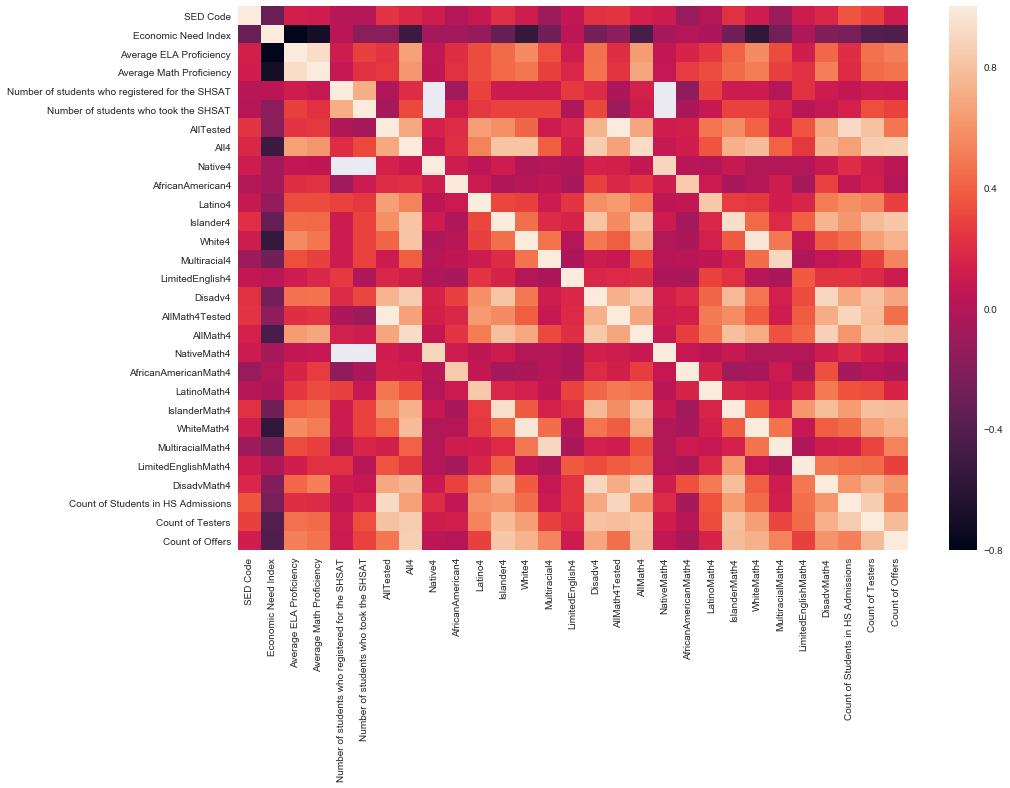

In [25]:
# Now we use corr() to get the feature correlations and 
#then visualize them using a heatmap 
#The correlation values are fed into the heatmap to gain further insight.

# Documentation referred at:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,10))
sns.heatmap(df_sub.corr())

### Insights:
From the correlation values and heatmap, we can see that 'Economic Need Index' is inversely correlated with high negative values to 
- 'Average ELA Proficiency', 
- 'Average Math Proficiency', 
- 'White4',  
- 'WhiteMath4', 
- 'Count of Testers' and
- 'Count of Offers'. 
Thus, the general assumption that schools with greater economic needs 
- perform more poorly on ELA and Math tests, 
- have lesser White students,
- have fewer students taking the tests and
- consequently getting less SHSAT offers holds true.


Now to apply clustering techniques, we will limit the number of features further. We will use only the following columns as :
- 'Economic Need Index',
- 'AfricanAmerican4',
-  'Latino4',
-  'White4',
-  'AfricanAmericanMath4',
-  'LatinoMath4',
-  'WhiteMath4',
-  'Number of students who took the SHSAT',
-  'Count of Students in HS Admissions',
-  'Count of Offers']

In [26]:
sub = df_sub[['Economic Need Index',
'AfricanAmerican4',
 'Latino4',
 'White4',
 'AfricanAmericanMath4',
 'LatinoMath4',
 'WhiteMath4',
 'Number of students who took the SHSAT',
 'Count of Offers']]
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 9 columns):
Economic Need Index                      1339 non-null float64
AfricanAmerican4                         1364 non-null float64
Latino4                                  1364 non-null float64
White4                                   1364 non-null float64
AfricanAmericanMath4                     1364 non-null float64
LatinoMath4                              1364 non-null float64
WhiteMath4                               1364 non-null float64
Number of students who took the SHSAT    113 non-null float64
Count of Offers                          683 non-null float64
dtypes: float64(9)
memory usage: 106.6 KB


In [27]:
sub.corr()

,Economic Need Index,AfricanAmerican4,Latino4,White4,AfricanAmericanMath4,LatinoMath4,WhiteMath4,Number of students who took the SHSAT,Count of Offers
Economic Need Index,1.000000,-0.072707,-0.127446,-0.549216,0.004962,-0.029510,-0.566390,-0.172916,-0.421596
AfricanAmerican4,-0.072707,1.000000,0.095225,0.012959,0.839716,0.098546,-0.004120,0.098985,0.000243
Latino4,-0.127446,0.095225,1.000000,0.277335,0.058003,0.833767,0.249102,0.254371,0.285010
White4,-0.549216,0.012959,0.277335,1.000000,-0.044113,0.136859,0.973047,0.291501,0.738594
AfricanAmericanMath4,0.004962,0.839716,0.058003,-0.044113,1.000000,0.161130,-0.048821,-0.036843,-0.044907
LatinoMath4,-0.029510,0.098546,0.833767,0.136859,0.161130,1.000000,0.132373,0.080072,0.157090
WhiteMath4,-0.566390,-0.004120,0.249102,0.973047,-0.048821,0.132373,1.000000,0.291501,0.727092
Number of students who took the SHSAT,-0.172916,0.098985,0.254371,0.291501,-0.036843,0.080072,0.291501,1.000000,0.291501
Count of Offers,-0.421596,0.000243,0.285010,0.738594,-0.044907,0.157090,0.727092,0.291501,1.000000


In [28]:
sub=sub.fillna(0)

In [29]:
# copy dataframe into sub1 for decision tree to get score 
sub1 = sub
sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 9 columns):
Economic Need Index                      1364 non-null float64
AfricanAmerican4                         1364 non-null float64
Latino4                                  1364 non-null float64
White4                                   1364 non-null float64
AfricanAmericanMath4                     1364 non-null float64
LatinoMath4                              1364 non-null float64
WhiteMath4                               1364 non-null float64
Number of students who took the SHSAT    1364 non-null float64
Count of Offers                          1364 non-null float64
dtypes: float64(9)
memory usage: 106.6 KB


We use Decision Tree metjod to determine if indeed our selected features are relevant or not using score() methods.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# Done: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = sub1.drop('Count of Offers', axis=1)

# Done: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, sub1['Count of Offers'], test_size=0.25, random_state=32)

# Done: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=32)
regressor.fit(X_train,y_train)

# Done: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print(round(score,4))

0.0923


/Users/nirupamaprv/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
# copy dataframe into sub2 for decision tree to get score 
sub2 = sub
sub2.info()

from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# Done: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = sub2.drop('Economic Need Index', axis=1)

# Done: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, sub2['Economic Need Index'], test_size=0.25, random_state=32)

# Done: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=32)
regressor.fit(X_train,y_train)

# Done: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print(round(score,4))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 9 columns):
Economic Need Index                      1364 non-null float64
AfricanAmerican4                         1364 non-null float64
Latino4                                  1364 non-null float64
White4                                   1364 non-null float64
AfricanAmericanMath4                     1364 non-null float64
LatinoMath4                              1364 non-null float64
WhiteMath4                               1364 non-null float64
Number of students who took the SHSAT    1364 non-null float64
Count of Offers                          1364 non-null float64
dtypes: float64(9)
memory usage: 146.6 KB
0.2061


In [32]:
# copy dataframe into sub3 for decision tree to get score 
sub3 = sub
sub3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1363
Data columns (total 9 columns):
Economic Need Index                      1364 non-null float64
AfricanAmerican4                         1364 non-null float64
Latino4                                  1364 non-null float64
White4                                   1364 non-null float64
AfricanAmericanMath4                     1364 non-null float64
LatinoMath4                              1364 non-null float64
WhiteMath4                               1364 non-null float64
Number of students who took the SHSAT    1364 non-null float64
Count of Offers                          1364 non-null float64
dtypes: float64(9)
memory usage: 146.6 KB


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# Done: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = sub3.drop('Number of students who took the SHSAT', axis=1)

# Done: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, sub3['Number of students who took the SHSAT'], test_size=0.25, random_state=32)

# Done: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=32)
regressor.fit(X_train,y_train)

# Done: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print(round(score,4))

0.3862


The coefficient of determination, R^2, is scored between 0 and 1, with 1 being a perfect fit. A negative R^2 implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance. Thus, 'Count of Offers' and 'Economic Need Index' are important features while 'Number of students who took the SHSAT' is of medium importance and validate our choice of features in the subset we are considering.

<a id='stepz'></a>

### Algorithms and Techniques
Here we will be using Kmeans and GMM algorithms to determine the best clustering method for the datasets. We will use scatterpplot matrix, Elbow curve and Silhouette score to evaluate if the number of clusters is optimal. The silhouette score will also be used to compare against benchmark model.
We are using Kmeans clustering as it is easy to implement, provides tight clusters and with our use of Silhouette score can give us the optimal number of clusters as well. (offsets its disadvantage of difficulty in predicting number of clusters)
The Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. This method will also ensure that the main practical issues with k-means will be removed namely, allowing for a full covariance and not using hard cutoffs for cluster assignment within the training set. thus, we can be sure that the best clusters and numbers are obtained.

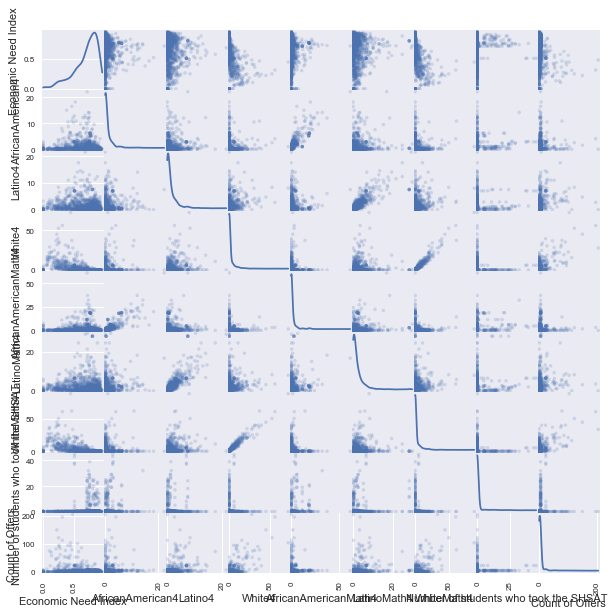

In [34]:
from pandas.plotting import scatter_matrix

scatter_matrix(sub, alpha=0.2, figsize=(10, 10), diagonal='kde');

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.


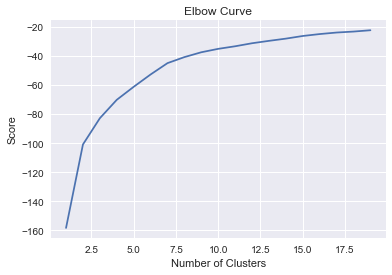

In [120]:
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scaling of data
ss = StandardScaler()
ss.fit_transform(sub)

minmax = MinMaxScaler()
minmax.fit_transform(sub)

x = sub.iloc[:, ].values
z = minmax.fit_transform(x)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(z).score(z) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Thus, we can consider 3 clusters although 7 or 8 clusters also look feasible using the Elbow Curve method.

<a id='step3'></a>

## Methodology

### Data Preprocessing
Since the dataset is from Kaggle, only minimal preprocessing was done on the dataset. Most of the wrangling was simply joining the datasets and subsetting to include only relevant attributes. The rating percentages had converted to float values with the percent symbol stripped while test scores for all each particular race was computed as average of individual grade level scores. Feature relevance was determined by using creating a decision tree regressor and fitting it to the training set and then reporting the score of the prediction using the testing set.

### Implementation
For execution, we will be using sklearn to determine the clusters and centers using K-means. We will then do the same with GMM algorithm and then compute the silhouette score. We shall do so for cluster numbered for 3,4,7,8.
We will then compute silhouette score for clusters numbered 3 to 8 using Kmeans and additionally create cluster maps to see how each clsuter number chosen fared.

### Refinement
The refinement was basically to evaluate which cluster number gave the best results. Hence, both GMM and Kmeans algorithms were used. Also, my proposal simply considerd silhouette score but I added using elbow curve method as well and evaluated this metric for all the clsuter numbers and for both algorithms to hone in on the right groups.

#### [Home](#home): Back to Top

### Cluster centers for n=8 clusters using K-means

In [121]:
from sklearn.cluster import KMeans
import numpy as np
X = sub
kmeans = KMeans(n_clusters=8, random_state=0).fit(sub)
kmeans.labels_
#kmeans.predict([[0, 0], [4, 4]])
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[  2.86024096e-01   3.19277108e-01   1.63253012e+00   1.14959839e+01
    3.19277108e-01   2.05823293e+00   1.50582329e+01   0.00000000e+00
    2.16867470e+00]
 [  3.41000000e-01   1.80000000e+00   4.73333333e+00   5.07000000e+01
    1.86666667e+00   4.60000000e+00   5.52333333e+01   0.00000000e+00
    1.55400000e+02]
 [  7.03391595e-01   6.28621458e-01   8.40337472e-01   4.89652977e-01
    7.32569245e-01   1.19134034e+00   6.72715696e-01   1.43266476e-01
    2.26552053e+00]
 [  3.41120000e-01   1.22000000e+00   4.58000000e+00   1.92600000e+01
    1.16666667e+00   4.87333333e+00   2.15400000e+01  -2.22044605e-16
    7.18800000e+01]
 [  5.21208333e-01   1.37847222e+00   4.88888889e+00   5.78125000e+00
    1.14236111e+00   5.01041667e+00   5.55208333e+00   3.33333333e-01
    2.34166667e+01]
 [  7.61400000e-01   1.67000000e+00   1.29000000e+00   4.80000000e-01
    3.86333333e+00   2.12333333e+00   4.13333333e-01   2.05400000e+01
    6.44000000e+00]
 [  6.85725490e-01   7.95751634e+00   1.

### Silhouette score for n=8 clusters using GMM

In [122]:
# Links used: 
# http://scikit-learn.org/stable/modules/clustering.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# Done: Apply your clustering algorithm of choice to the reduced data
x3 = GMM(n_components=8)

reduced_data=sub
clusterer = x3.fit(reduced_data)

# Done: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Done: Find the cluster centers
centers = clusterer.means_

# Done: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(cluster_centers)

# Done: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print(round(score,4))
print("Scores for 8 clusters is {}".format(round(score,4)))

0.0867
Scores for 8 clusters is 0.0867


### Cluster centers for n=3 clusters using K-means

In [123]:
from sklearn.cluster import KMeans
import numpy as np
X2 = sub
kmeans = KMeans(n_clusters=3, random_state=0).fit(X2)
kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[  6.73086336e-01   9.71596597e-01   1.31481481e+00   1.34034034e+00
    1.53365866e+00   1.96559059e+00   1.70170170e+00   9.70720721e-01
    3.23198198e+00]
 [  3.45518519e-01   1.15432099e+00   4.36419753e+00   1.92962963e+01
    1.10493827e+00   4.66666667e+00   2.14259259e+01  -3.33066907e-16
    6.93333333e+01]
 [  3.41000000e-01   1.80000000e+00   4.73333333e+00   5.07000000e+01
    1.86666667e+00   4.60000000e+00   5.52333333e+01   0.00000000e+00
    1.55400000e+02]]


### Silhouette score for n=3 clusters  using GMM

In [124]:
# Links used: 
# http://scikit-learn.org/stable/modules/clustering.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# Done: Apply your clustering algorithm of choice to the reduced data
x3 = GMM(n_components=3)

reduced_data2=sub
clusterer = x3.fit(reduced_data2)

# Done: Predict the cluster for each data point
preds = clusterer.predict(reduced_data2)

# Done: Find the cluster centers
centers = clusterer.means_

# Done: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(cluster_centers)

# Done: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data2, preds)

print(round(score,4))
print("Scores for 3 clusters is {}".format(round(score,4)))

0.2614
Scores for 3 clusters is 0.2614


### Cluster centers for n=7 clusters using K-means

In [125]:
from sklearn.cluster import KMeans
import numpy as np
X2 = sub
kmeans = KMeans(n_clusters=7, random_state=0).fit(X2)
kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[  6.88205457e-01   4.97057250e-01   9.84216158e-01   6.23863028e-01
    7.41305511e-01   1.76404494e+00   9.21883360e-01  -4.44089210e-16
    5.50670620e-14]
 [  3.41000000e-01   1.80000000e+00   4.73333333e+00   5.07000000e+01
    1.86666667e+00   4.60000000e+00   5.52333333e+01   0.00000000e+00
    1.55400000e+02]
 [  3.41120000e-01   1.22000000e+00   4.58000000e+00   1.92600000e+01
    1.16666667e+00   4.87333333e+00   2.15400000e+01  -2.22044605e-16
    7.18800000e+01]
 [  5.19595745e-01   1.40780142e+00   4.94680851e+00   5.85460993e+00
    1.16666667e+00   5.09574468e+00   5.62765957e+00   3.40425532e-01
    2.36170213e+01]
 [  7.20851562e-01   8.88671875e-01   1.24479167e+00   4.40429688e-01
    9.38802083e-01   1.51660156e+00   5.08463542e-01   7.81250000e-01
    5.19921875e+00]
 [  2.77413333e-01   3.44444444e-01   1.63777778e+00   1.21000000e+01
    3.40000000e-01   2.02000000e+00   1.57688889e+01   4.44089210e-16
    2.13333333e+00]
 [  7.05155844e-01   5.69047619e+00   1.

### Silhouette score for n=7 clusters using GMM

In [126]:
# Links used: 
# http://scikit-learn.org/stable/modules/clustering.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# Done: Apply your clustering algorithm of choice to the reduced data
x3 = GMM(n_components=7)

reduced_data2=sub
clusterer = x3.fit(reduced_data2)

# Done: Predict the cluster for each data point
preds = clusterer.predict(reduced_data2)

# Done: Find the cluster centers
centers = clusterer.means_

# Done: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(cluster_centers)

# Done: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data2, preds)

print(round(score,4))
print("Scores for 7 clusters is {}".format(round(score,4)))

0.1008
Scores for 7 clusters is 0.1008


### Cluster centers for n=4 clusters using K-means

In [127]:
from sklearn.cluster import KMeans
import numpy as np
X2 = sub
kmeans = KMeans(n_clusters=4, random_state=0).fit(X2)
kmeans.labels_
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[  7.01517270e-01   9.85882675e-01   1.12595943e+00   5.18777412e-01
    1.60389254e+00   1.80317982e+00   7.12856360e-01   9.16118421e-01
    2.55016447e+00]
 [  3.49615385e-01   1.19230769e+00   4.49358974e+00   1.85256410e+01
    1.14743590e+00   4.81410256e+00   2.07179487e+01  -3.33066907e-16
    7.11538462e+01]
 [  3.41000000e-01   1.80000000e+00   4.73333333e+00   5.07000000e+01
    1.86666667e+00   4.60000000e+00   5.52333333e+01   0.00000000e+00
    1.55400000e+02]
 [  3.73888889e-01   8.16239316e-01   3.27492877e+00   1.02037037e+01
    7.90598291e-01   3.64387464e+00   1.23048433e+01   1.52991453e+00
    1.04786325e+01]]


### Silhouette score for n=4 clusters using GMM

In [128]:
# Links used: 
# http://scikit-learn.org/stable/modules/clustering.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# Done: Apply your clustering algorithm of choice to the reduced data
x3 = GMM(n_components=4)

reduced_data2=sub
clusterer = x3.fit(reduced_data2)

# Done: Predict the cluster for each data point
preds = clusterer.predict(reduced_data2)

# Done: Find the cluster centers
centers = clusterer.means_

# Done: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(cluster_centers)

# Done: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data2, preds)

print(round(score,4))
print("Scores for 4 clusters is {}".format(round(score,4)))

0.1711
Scores for 4 clusters is 0.1711


In [129]:
#Creating cluster map to visualize clusters
from sklearn.metrics import silhouette_samples, silhouette_score

In [130]:
X = sub[['Economic Need Index',
'AfricanAmerican4',
 'Latino4',
 'White4',
 'AfricanAmericanMath4',
 'LatinoMath4',
 'WhiteMath4',
 'Number of students who took the SHSAT',
 'Count of Offers']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )


In [131]:
import matplotlib.cm as cm
import seaborn as sn
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

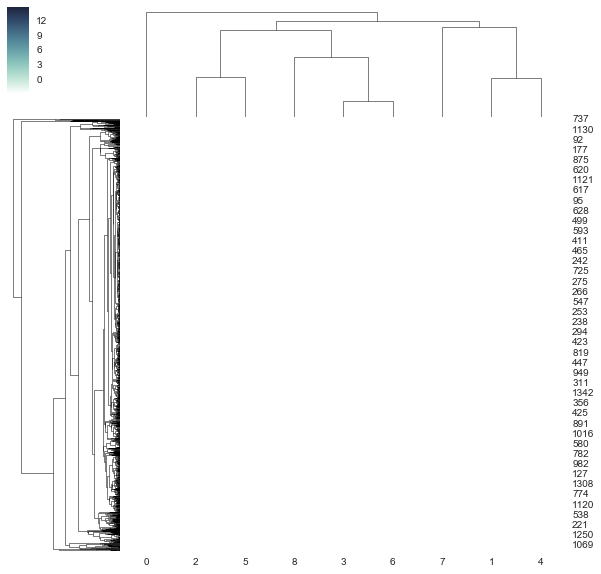

In [132]:
sn.clustermap(X_scaled, cmap=cmap, linewidths=.5);

### Cluster maps and silhouette scores using Kmeans for number of clusters ranging from 3 to 8

For n_clusters = 3 The average silhouette_score is : 0.136093673461


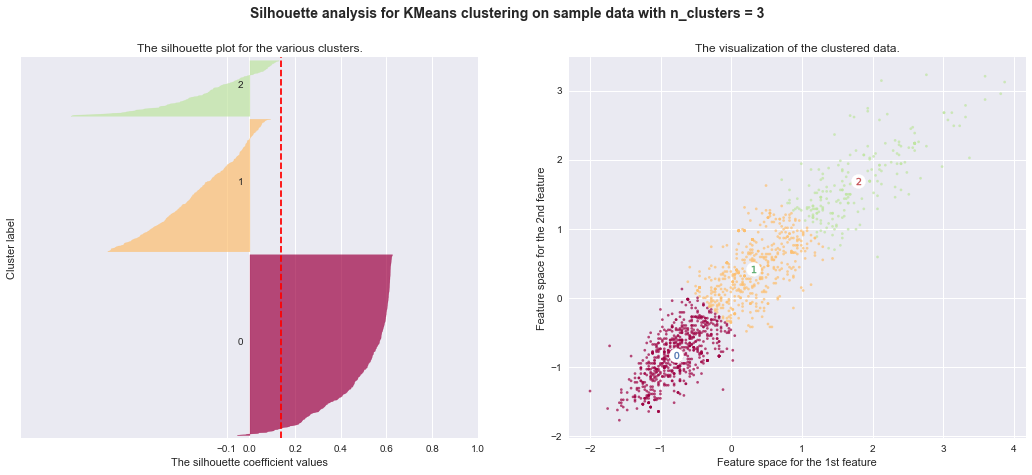

For n_clusters = 4 The average silhouette_score is : 0.0468701715674


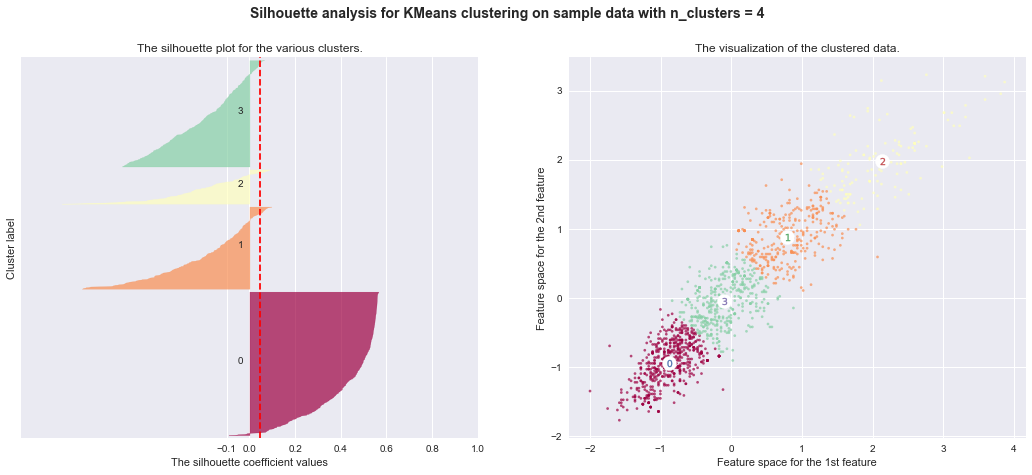

For n_clusters = 5 The average silhouette_score is : -0.042891642501


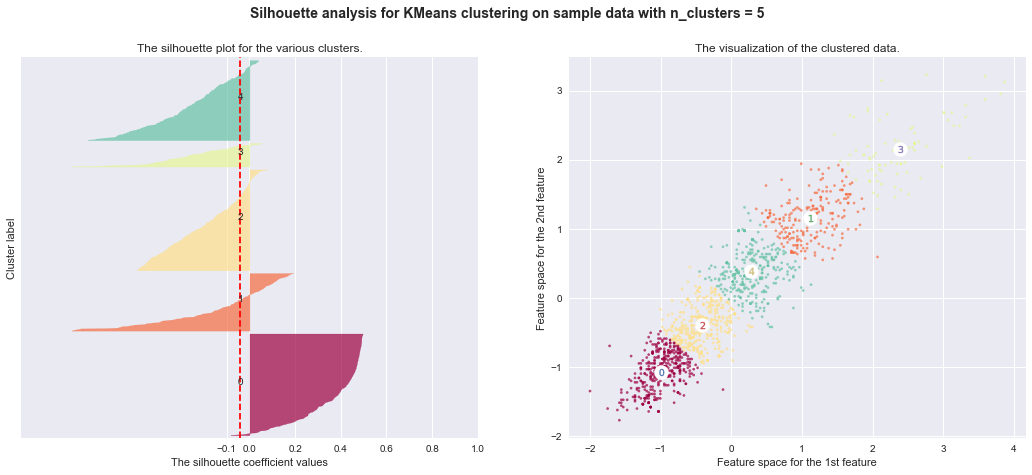

For n_clusters = 6 The average silhouette_score is : -0.088717441224


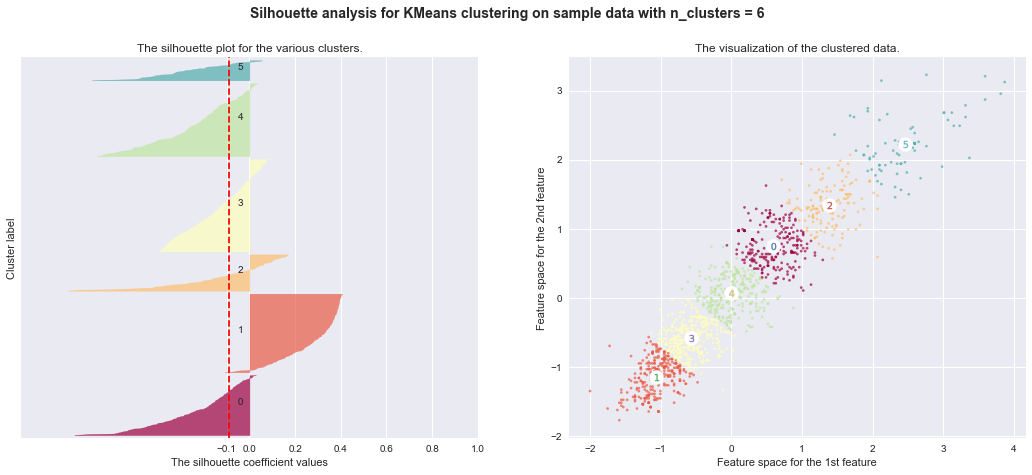

For n_clusters = 7 The average silhouette_score is : -0.117164474281


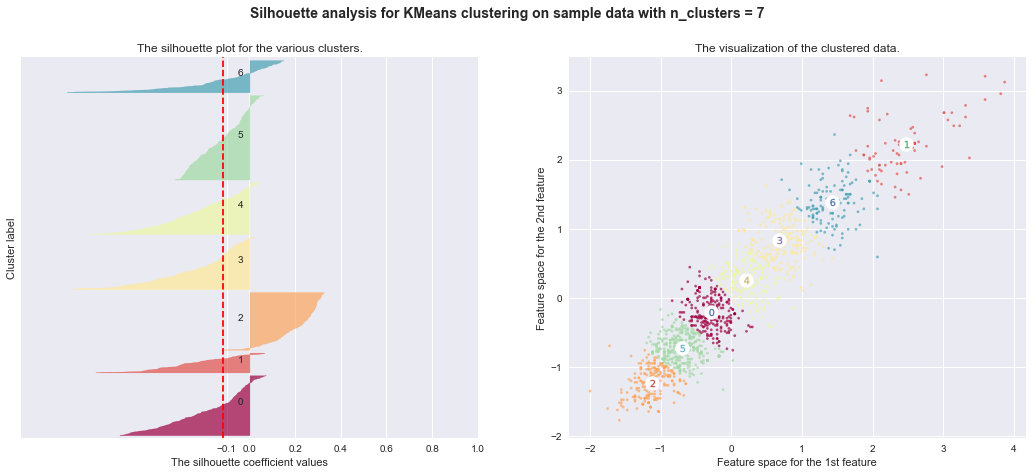

For n_clusters = 8 The average silhouette_score is : -0.128381626926


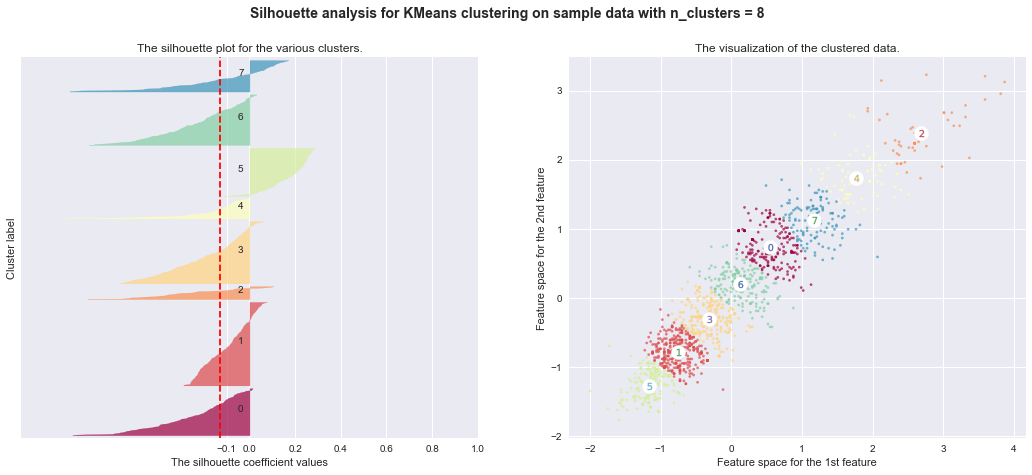

In [133]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm

%matplotlib inline

cluster_range = range( 3, 9 ) #range excludes upper bound

for n_clusters in cluster_range:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 
  ax1.set_xlim([-1, 1])
  
 # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  #cluster_labels = clusterer.fit_predict( X_scaled )
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X1_scaled)

  cluster_labels = kmeans.predict(X1_scaled)#cluster.fit_predict( X1_scaled )
  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      cmap = cm.get_cmap("Spectral")
      color = cmap(float(i) / n_clusters)

      #color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  
  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  #cmap = cm.get_cmap("Spectral")
  colors = cmap(cluster_labels.astype(float) / n_clusters)
  #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X1_scaled[:, 0], X1_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = kmeans.cluster_centers_
  #centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show();


Thus, for clusters =3, we get the best results when considering clustermap, GMM and K-means techniques.

<a id='stepq'></a>

### Benchmark:
For this project, the benchmark model is the kernel from the Kaggle dataset at:
https://www.kaggle.com/laiyipeng/target-schools-action-recommended-for-passnyc
<br>It was one of the winners when the competition (using this dataset) originally ran. There are 3 clusters present in this analysis. I shall try to compare my model with this analysis.

In the benchmark model, we have:
1) New York State annual test results</br>
2) New York City Department of Education annual quality review</br>
3) Other</br>

Since this original kernel is in R and approaches the problem with a different angle and does not compute silhouette score, am reproducing the dataset and joins used and computing the silhouette scores for this model.

In [106]:
benchmark =dfy
benchmark.shape

(1364, 71)

In [107]:
benchmark = benchmark.drop([
         'School Name',
         'SED Code',
         'Location Code',
         'District',
         'Latitude',
         'Longitude',
         'Address (Full)',
         'City',
         'Zip',
         'Grades',
         'Grade Low',
         'Grade High',
         'Community School?',
         'Economic Need Index',
         'School Income Estimate',
         'Percent ELL',
         'Percent Asian',
         'Percent Black',
         'Percent Hispanic',
         'Percent Black / Hispanic',
         'Percent White',
         'Student Achievement Rating',
         'Grade 3 Math 4s - Multiracial',
         'DBN',
         'School name',
         'Year of SHST',
         'Grade level',
         'Enrollment on 10/31',
         'Number of students who registered for the SHSAT',
         'Number of students who took the SHSAT',
         'AllTested',
         'All4',
         'Native4',
         'AfricanAmerican4',
         'Latino4',
         'Islander4',
         'White4',
         'Multiracial4',
         'LimitedEnglish4',
         'Disadv4',
         'AllMath4Tested',
         'AllMath4',
         'NativeMath4',
         'AfricanAmericanMath4',
         'LatinoMath4',
         'IslanderMath4',
         'WhiteMath4',
         'MultiracialMath4',
         'LimitedEnglishMath4',
         'DisadvMath4',
         'Feeder School DBN',
         'Feeder School Name',
         'Count of Students in HS Admissions',
         'Count of Testers',
         'Rigorous Instruction Rating',
         'Collaborative Teachers Rating',
         'Supportive Environment Rating',
         'Effective School Leadership Rating',
         'Strong Family-Community Ties Rating',
         'Trust Rating'],
    axis=1)

In [108]:
benchmark.shape

(1364, 11)

In [109]:
list(benchmark)

['Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Collaborative Teachers %',
 'Supportive Environment %',
 'Effective School Leadership %',
 'Strong Family-Community Ties %',
 'Trust %',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Count of Offers']

In [110]:
benchmark.head(2)

,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency,Count of Offers
0,94%,18%,89%,94%,86%,91%,85%,94%,2.14,2.17,NaN
1,92%,30%,96%,96%,97%,90%,86%,94%,2.63,2.98,NaN


In [111]:
benchmark['Student Attendance Rate']  = benchmark['Student Attendance Rate'] .str.rstrip('%').astype('float') / 100.0
benchmark['Percent of Students Chronically Absent']  = benchmark['Percent of Students Chronically Absent'] .str.rstrip('%').astype('float') / 100.
benchmark['Rigorous Instruction %']  = benchmark['Rigorous Instruction %'] .str.rstrip('%').astype('float') / 100.0
benchmark['Collaborative Teachers %']  = benchmark['Collaborative Teachers %'] .str.rstrip('%').astype('float') / 100.0
benchmark['Supportive Environment %']  = benchmark['Supportive Environment %'] .str.rstrip('%').astype('float') / 100.0
benchmark['Effective School Leadership %']  = benchmark['Effective School Leadership %'] .str.rstrip('%').astype('float') / 100.0
benchmark['Strong Family-Community Ties %']  = benchmark['Strong Family-Community Ties %'] .str.rstrip('%').astype('float') / 100.0
benchmark['Trust %']  = benchmark['Trust %'] .str.rstrip('%').astype('float') / 100.0



In [112]:
benchmark.head(2)

,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency,Count of Offers
0,0.94,0.18,0.89,0.94,0.86,0.91,0.85,0.94,2.14,2.17,NaN
1,0.92,0.30,0.96,0.96,0.97,0.90,0.86,0.94,2.63,2.98,NaN


In [113]:
benchmark.fillna(0)

,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,Average ELA Proficiency,Average Math Proficiency,Count of Offers
0,0.94,0.18,0.89,0.94,0.86,0.91,0.85,0.94,2.14,2.17,0.0
1,0.92,0.30,0.96,0.96,0.97,0.90,0.86,0.94,2.63,2.98,0.0
2,0.94,0.20,0.87,0.77,0.82,0.61,0.80,0.79,2.39,2.54,0.0
3,0.92,0.28,0.85,0.78,0.82,0.73,0.89,0.88,2.48,2.47,5.0
4,0.93,0.23,0.90,0.88,0.87,0.81,0.89,0.93,2.38,2.54,0.0
5,0.92,0.33,0.93,0.99,0.95,0.91,0.88,0.97,2.29,2.48,0.0
6,0.95,0.13,0.88,0.78,0.95,0.69,0.87,0.78,2.80,3.20,0.0
7,0.91,0.36,0.87,0.89,0.88,0.88,0.79,0.94,2.28,2.73,0.0
8,0.93,0.27,0.94,0.91,0.85,0.87,0.83,0.93,2.21,2.27,5.0
9,0.92,0.27,0.92,0.89,0.90,0.83,0.89,0.95,2.16,2.31,0.0


In [114]:
#Check for  nulls if any
benchmark.isnull().any()

Student Attendance Rate                   True
Percent of Students Chronically Absent    True
Rigorous Instruction %                    True
Collaborative Teachers %                  True
Supportive Environment %                  True
Effective School Leadership %             True
Strong Family-Community Ties %            True
Trust %                                   True
Average ELA Proficiency                   True
Average Math Proficiency                  True
Count of Offers                           True
dtype: bool

In [115]:
#Replace nulls if any
benchmark = benchmark.fillna(method='ffill')


In [116]:
X1 = benchmark[[
 'Average ELA Proficiency',
 'Average Math Proficiency']]



In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_scaled = scaler.fit_transform( X1 )

In [118]:
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

For n_clusters = 3 The average silhouette_score is : 0.524550817343


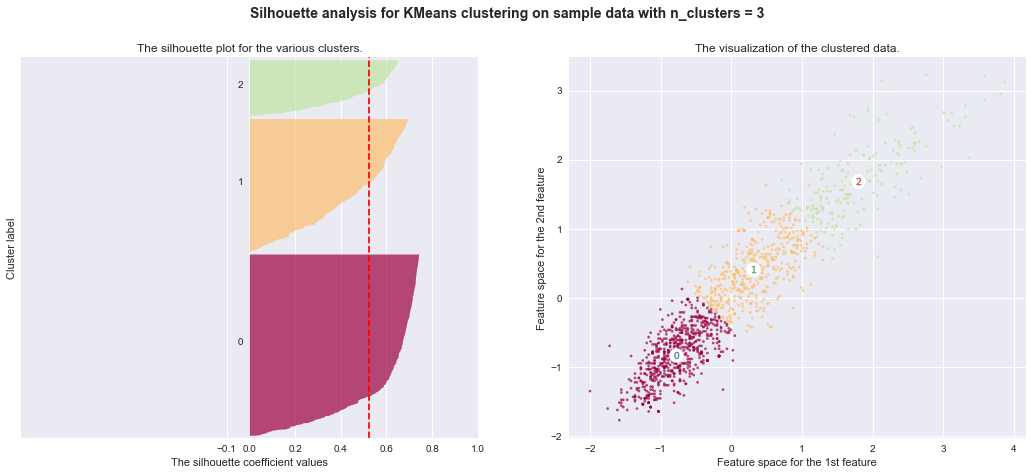

For n_clusters = 4 The average silhouette_score is : 0.471940565474


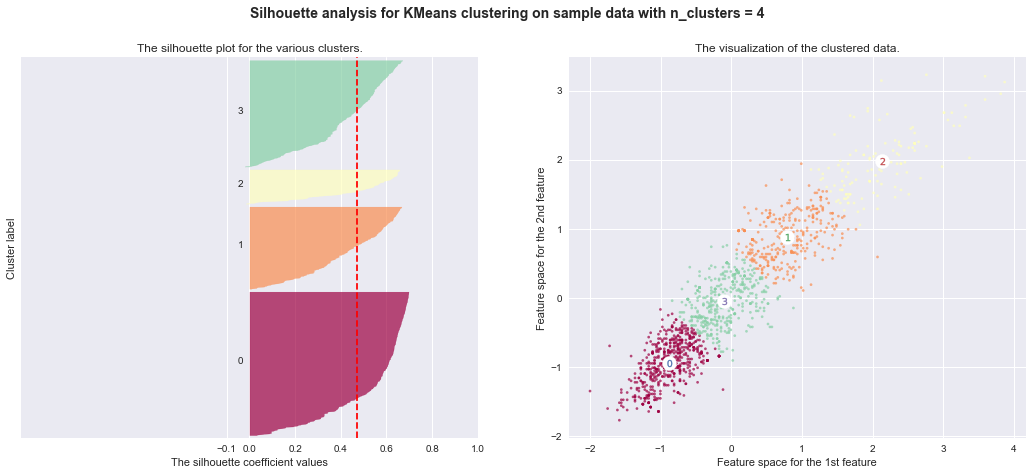

For n_clusters = 5 The average silhouette_score is : 0.431472108772


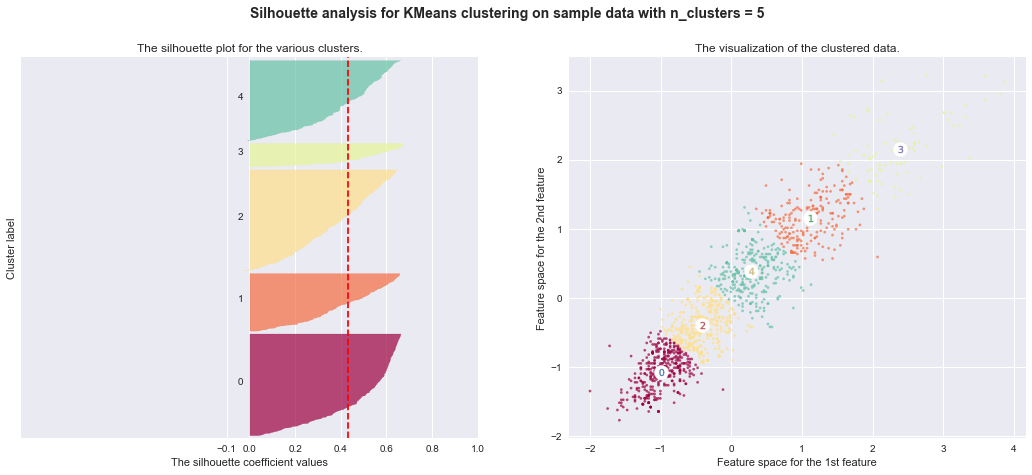

For n_clusters = 6 The average silhouette_score is : 0.398217438323


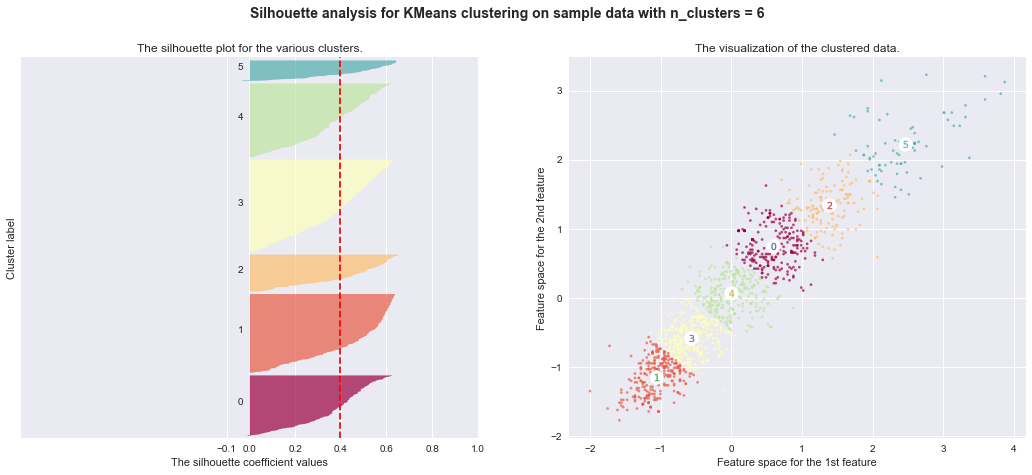

For n_clusters = 7 The average silhouette_score is : 0.376864996601


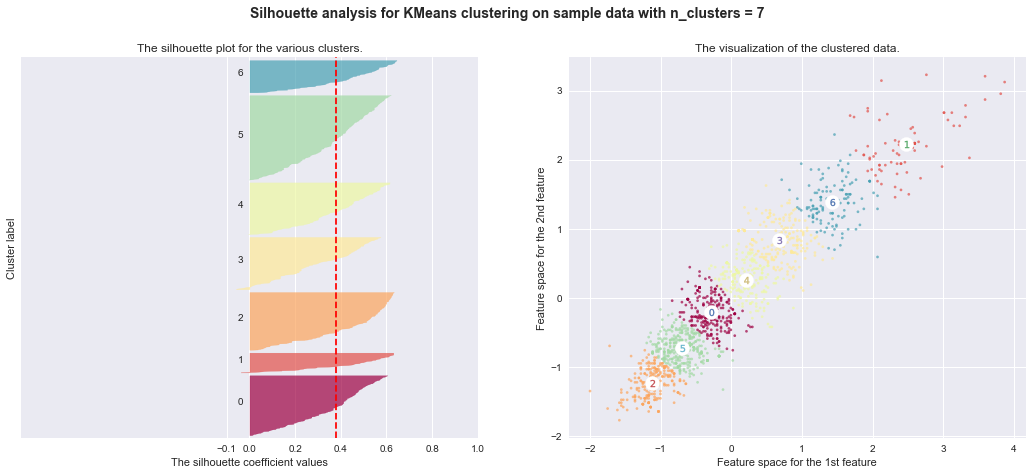

For n_clusters = 8 The average silhouette_score is : 0.357279809328


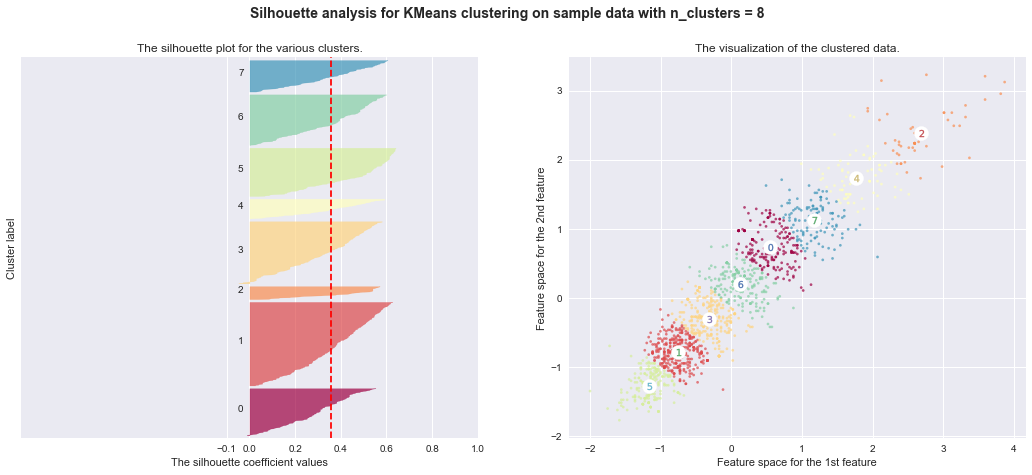

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_range = range( 3, 9 ) #range excludes upper bound

for n_clusters in cluster_range:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 
  ax1.set_xlim([-1, 1])
  
 # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X1_scaled) + (n_clusters + 1) * 10])
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X1_scaled)

  cluster_labels = kmeans.predict(X1_scaled)#cluster.fit_predict( X1_scaled )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X1_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X1_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      cmap = cm.get_cmap("Spectral")
      color = cmap(float(i) / n_clusters)

      #color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  
  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  cmap = cm.get_cmap("Spectral")
  colors = cmap(cluster_labels.astype(float) / n_clusters)
  #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X1_scaled[:, 0], X1_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = kmeans.cluster_centers_
  #centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show();



<a id='step4'></a>

## Results 
* [Model Evaluation and Validation](#step11): Evaluation of Analysis
* [Justification](#step12): Validation based final inference

#### [Home](#home): Back to Top

<a id='step11'></a>

### Model Evaluation and Validation
Silhouette score is the best for clusters =3 in our model using GMM technique. For K-means it shows best as clusters =4, and close to 0 for clusters =3, but the visuals clearly show that this is a result of overlapping. Given that Kmeans suffer from spherical clustering, this seems to validate the score as 3. When we compare with our benchmark model too, we get the silhouette score as same for clusters =3 to clusters =8 but the visuals clearly show the homogenous clustering for clusters =3. Thus, we can acertain that clusters =3 is the optimal solution and comparable to benchmark model.

<a id='step12'></a>

### Justification
For the benchmark model as well, the best scores and homogenous clusters are for clusters = 3. It also is important to note that the original benchmark solution had ascertained cluster number as 3 though not using the techniques we employ. Thus, we can see that the clustering algorithms applied using our methods provides an equal measure of accuracy and hence, we can consider out model to be a good model.

<a id='step5'></a>


## Conclusion

#### [Home](#home): Back to Top

### Reflection
In this project, the intent was to categorize the schools based on the variables, finding the optimal number of segments along the way. We did this using Kmeans and GMM with silhouette score as the basis of evaluation and comparison against benchmark model.
One aspect that was interesting and challenging was determining the best silhouette score since we had very close values for the benchmark model for clusters numbering from 3 to 8. However, it is the visuals that help to pinpoint the right size. Again, for our model, GMM matched but not K-means; where it seemed like the right size did not match since 4 seemed to have best silhouette score value. Here too, the visuals provided a better comprehension with the overlapping effect evident (score of 0 again indicates close clusters which holds true with spherical contraints of k-means).

### Improvement
One aspect of the analysis that can be improved is to use the analysis is to evaluate the performance using different seed values. Seed values were used in kmeans clustering and feature relevance prediction.

<a id='step6'></a>

### References
Please find below referenced articles and links in addition to those added in relevant sections.
- http://www.awesomestats.in/python-cluster-validation/ 
- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
- http://scikit-learn.org/stable/modules/clustering.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
- https://en.wikipedia.org/wiki/Elbow_method_(clustering)

#### [Home](#home)